In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

In [175]:
data = pd.read_csv('FraudData.csv')
data.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,account_type,errorBalanceOrig,errorBalanceDest
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM,0.0,9839.64
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM,0.0,1864.28
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC,0.0,181.00
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC,0.0,21363.00
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM,0.0,11668.14


In [197]:
data = data.loc[(data.type == 'CASH_OUT') | (data.type == 'TRANSFER')]

data_x, data_y = data.drop(columns = ['Unnamed: 0', 'step', 'nameOrig', 'nameDest', 'isFlaggedFraud','isFraud']), data.loc[:,'isFraud']

data_x = pd.get_dummies(data_x, ['type', 'account_type'])

data_x = data_x.drop(columns = ['type_CASH_OUT', 'account_type_CC'])

train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, random_state=42, test_size = 0.2)

columns = train_x.columns

In [198]:
data_x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_TRANSFER
2,181.00,181.0,0.0,0.0,0.00,0.00,181.0,1
3,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0,0
15,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5,0
19,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0,1


In [199]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = pd.DataFrame(scaler.transform(train_x))
val_x = pd.DataFrame(scaler.transform(val_x))

C:\Users\miles\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [200]:
train_x.columns = columns
val_x.columns = columns
train_x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_TRANSFER
0,-0.068569,-0.191532,-0.108367,-0.207319,-0.206603,-0.033300,0.048359,-0.488215
1,-0.272916,-0.107854,-0.108367,-0.308757,-0.336917,-0.264527,0.048359,-0.488215
2,-0.162471,-0.191532,-0.108367,-0.292767,-0.301604,-0.128564,0.048359,-0.488215
3,-0.135206,0.631140,-0.063931,-0.402940,-0.396085,-0.328453,0.048359,-0.488215
4,0.039550,-0.185565,-0.108367,-0.364378,-0.328217,0.074681,0.048359,-0.488215


In [201]:
#Undersampling
sampler = RandomUnderSampler(sampling_strategy = "majority", random_state = 5)
US_train_x, US_train_y = sampler.fit_resample(train_x, train_y)
US_train_x = pd.DataFrame(US_train_x)
US_train_y = pd.DataFrame(US_train_y)

In [202]:
US_train_x.head()

,0,1,2,3,4,5,6,7
0,-0.186760,-0.191532,-0.108367,-0.256614,-0.273497,-0.153205,0.048359,-0.488215
1,0.008348,-0.173645,-0.108367,-0.401951,-0.368086,0.039620,0.048359,-0.488215
2,-0.139515,-0.191532,-0.108367,0.169833,0.121060,-0.105275,0.048359,-0.488215
3,-0.290985,-0.191532,-0.108367,-0.327018,-0.356842,-0.258942,0.048359,-0.488215
4,-0.320308,-0.016977,-0.048986,-0.358742,-0.391067,-0.328453,0.048359,-0.488215


In [203]:
US_train_x.columns = train_x.columns
US_train_x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_TRANSFER
0,-0.186760,-0.191532,-0.108367,-0.256614,-0.273497,-0.153205,0.048359,-0.488215
1,0.008348,-0.173645,-0.108367,-0.401951,-0.368086,0.039620,0.048359,-0.488215
2,-0.139515,-0.191532,-0.108367,0.169833,0.121060,-0.105275,0.048359,-0.488215
3,-0.290985,-0.191532,-0.108367,-0.327018,-0.356842,-0.258942,0.048359,-0.488215
4,-0.320308,-0.016977,-0.048986,-0.358742,-0.391067,-0.328453,0.048359,-0.488215


In [204]:
US_train_y = np.ravel(US_train_y) # returns 1d array

In [205]:
logit = LogisticRegression()
logit.fit(US_train_x, US_train_y)

C:\Users\miles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
coef = np.ravel(logit.coef_)
coef = pd.DataFrame(coef)
coef['column'] = columns
coef = coef.sort_values(by = 0, ascending = False)

In [194]:
coef

,0,column
6,6.179780,errorBalanceDest
1,4.004018,oldbalanceOrg
3,0.678731,oldbalanceDest
7,0.622095,type_TRANSFER
4,-0.937618,newbalanceDest
2,-2.348434,newbalanceOrig
0,-4.036916,amount
5,-5.636617,errorBalanceOrig


In [207]:
logit.predict_proba(val_x)

array([[0.30670345, 0.69329655],
       [0.97070196, 0.02929804],
       [0.82537208, 0.17462792],
       ...,
       [0.53019791, 0.46980209],
       [0.96945603, 0.03054397],
       [0.99190151, 0.00809849]])

In [208]:
logit.score(val_x, val_y)

0.935114297161792

In [209]:
from sklearn.metrics import confusion_matrix
prediction = logit.predict(val_x)
confusion_matrix(prediction, val_y)

array([[516657,    173],
       [ 35779,   1473]], dtype=int64)

In [210]:
x = [1,2,3,4,5,6,7,8]

<BarContainer object of 8 artists>

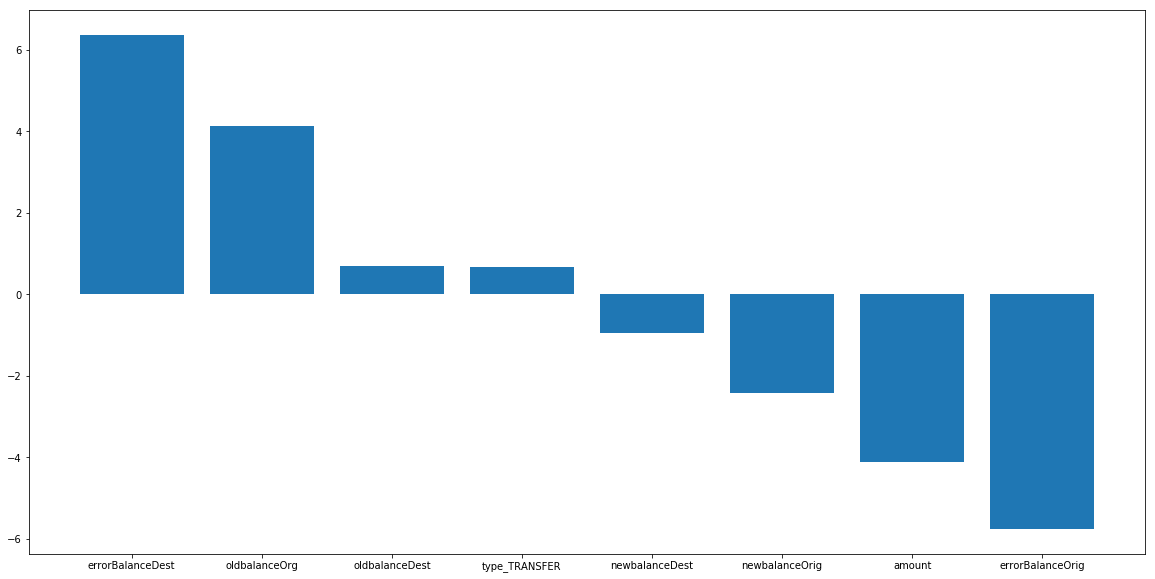

In [211]:
plt.figure(figsize = (20,10))
plt.bar(x, np.array(coef.loc[:,0]), tick_label = np.array(coef.loc[:,'column']))

In [212]:
from sklearn import metrics
# Evaluating model
CM_RF = confusion_matrix(val_y,prediction)
Acc = metrics.accuracy_score(val_y, prediction)
CR_RF = metrics.classification_report(val_y,prediction)
fprRF, recallRF, thresholdsRF = metrics.roc_curve(val_y, prediction)
AUC_RF = metrics.auc(fprRF, recallRF)
errors = abs(prediction - val_y)
MAS = np.mean(errors), 'degrees.'
resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}


# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(val_y,prediction)

print("Recall metric in the testing dataset: {0:.4f}".format(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Confusion Matrix : 
 [[516657  35779]
 [   173   1473]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    552436
           1       0.04      0.89      0.08      1646

   micro avg       0.94      0.94      0.94    554082
   macro avg       0.52      0.92      0.52    554082
weighted avg       1.00      0.94      0.96    554082

Area Under Curve : 
 0.9150654229938145
Recall metric in the testing dataset: 0.8949


NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>